In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Data visualization and pre-processing

In [2]:
path_data = "./ECoG.npz"

with np.load(path_data) as EcoG_data:
    Xall = EcoG_data['Xall']
    Yall = EcoG_data['Yall']
    Fe = EcoG_data['Fe']

In [3]:
TrainSize = 1000

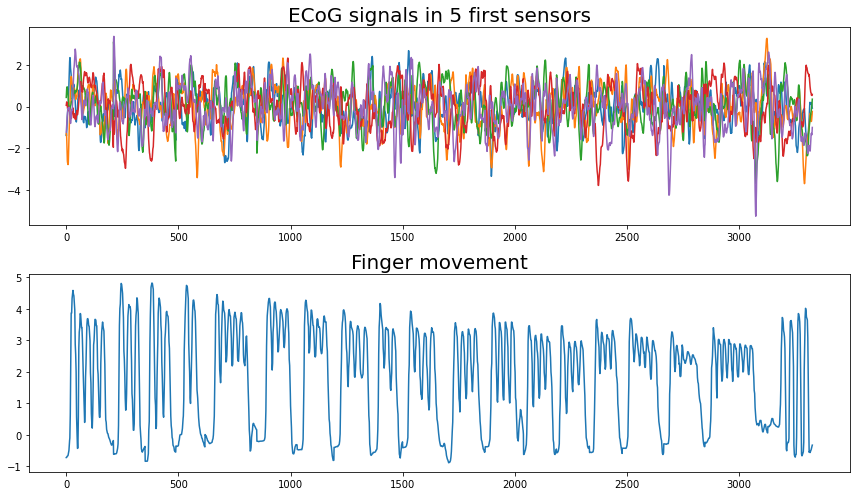

In [4]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("ECoG signals in 5 first sensors", size=20)
plt.plot(Xall[:,:5])

f.add_subplot(2, 1, 2)
plt.title("Finger movement", size=20)
plt.plot(Yall)

f.tight_layout()
plt.show()

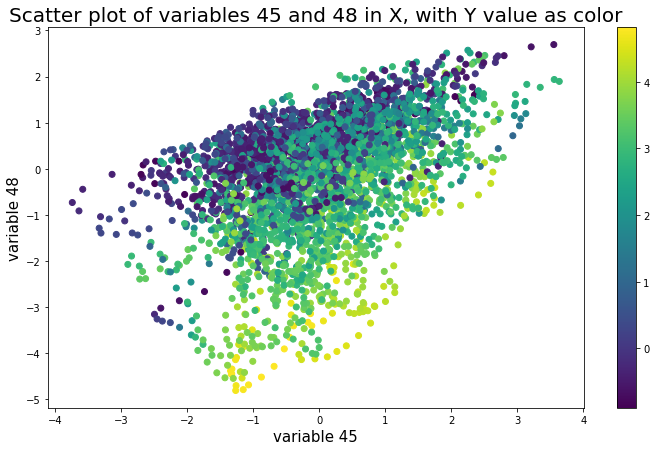

In [5]:
plt.figure(figsize=(12,7))
plt.scatter(x=Xall[:,45], y=Xall[:,48], c=Yall.reshape(-1,))
plt.xlabel("variable 45", size=15)
plt.ylabel("variable 48", size=15)
plt.title("Scatter plot of variables 45 and 48 in X, with Y value as color", size=20)
plt.colorbar()
plt.show()

## Split the data

In [6]:
XTrain = Xall[:TrainSize, ]
XTest = Xall[TrainSize:, ]

YTrain = Yall[:TrainSize]
YTest = Yall[TrainSize:]

# Least Squares regression (LS)

In [7]:
XTrain_ones = np.concatenate((XTrain, np.ones((TrainSize,1))), axis=1)

In [8]:
params = np.linalg.solve(a=XTrain_ones.T @ XTrain_ones, b=XTrain_ones.T @ YTrain)

w = params[:-1]
b = params[-1]

In [9]:
YTrain_pred = XTrain @ w + b
YTest_pred = XTest @ w + b

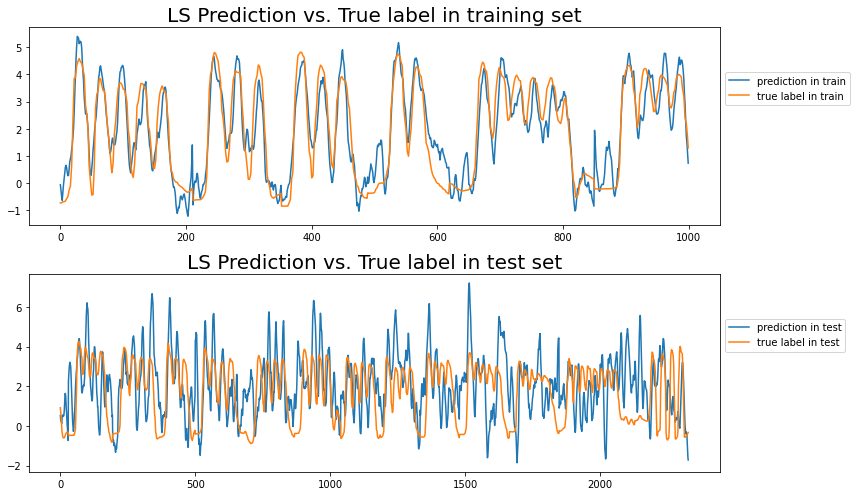

In [10]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("LS Prediction vs. True label in training set", size=20)
plt.plot(YTrain_pred, label='prediction in train')
plt.plot(YTrain, label='true label in train')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.add_subplot(2, 1, 2)
plt.title("LS Prediction vs. True label in test set", size=20)
plt.plot(YTest_pred, label='prediction in test')
plt.plot(YTest, label='true label in test')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.tight_layout()
plt.show()

In [11]:
mse_train = mean_squared_error(y_true=YTrain, y_pred=YTrain_pred)
r2_train = r2_score(y_true=YTrain, y_pred=YTrain_pred)

mse_test = mean_squared_error(y_true=YTest, y_pred=YTest_pred)
r2_test = r2_score(y_true=YTest, y_pred=YTest_pred)

print(f"For training set: MSE={mse_train}; R2={r2_train}")
print(f"For test set: MSE={mse_test}; R2={r2_test}")

For training set: MSE=0.5040654614476062; R2=0.8395001217500111
For test set: MSE=3.0455368767601727; R2=-0.42817006302225735


There is overfitting problem: the prediction is worsely performed on test set than training set. Especailly, we notice that R2 score on test set is negative, which means that the model is worse than the horizontal line y = mean(y).

In [12]:
reg = LinearRegression().fit(XTrain, YTrain)
print("The parameters w obtained by sklearn is: \n") 
print(reg.coef_)
print("The parameters w obtained previously is: \n") 
print(w.reshape(1,-1))

The parameters w obtained by sklearn is: 

[[-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
   0.14387528 -0.19811799  0.40869961  0.7059866  -0.4557358   0.02140866
   0.35947183 -0.01042572 -0.17655887 -0.03377368 -0.11345198 -0.72143135
  -0.5950915   0.23329595 -0.65132811 -0.33317441  0.28861537  0.24498034
   0.22062027  0.19042788  0.20709995  0.3273775  -0.65410592  0.11997444
  -0.07491945  0.10667581  0.11003235 -0.42910159 -0.22329342 -0.00381723
  -0.06046664 -0.1595164  -0.48519392  0.15019433  0.25855769 -0.09242374
   0.76314124 -0.0834797   0.04489988 -0.16816255  0.04845934  0.0256902
  -1.03905805  0.16060454 -0.19110549  0.16557271  0.08064689  0.27554638
  -0.01162067 -0.00740264  0.33850545  0.22409642 -0.2196636  -0.26866884
  -0.16469195 -0.23638421  0.04244268  0.5694358 ]]
The parameters w obtained previously is: 

[[-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
   0.14387528 -0.19811799  0.40869961  0.7059866 

In [13]:
print("The intercept b obtained by sklearn is: \n") 
print(reg.intercept_)
print("The intercept b obtained previously is: \n") 
print(b)

The intercept b obtained by sklearn is: 

[1.90081255]
The intercept b obtained previously is: 

[1.90081255]


We get the same result as before.

# Ridge regression

In [14]:
ridge = Ridge(alpha=1.0).fit(XTrain, YTrain)
ridge_pred_train = ridge.predict(XTrain)
ridge_pred_test = ridge.predict(XTest)

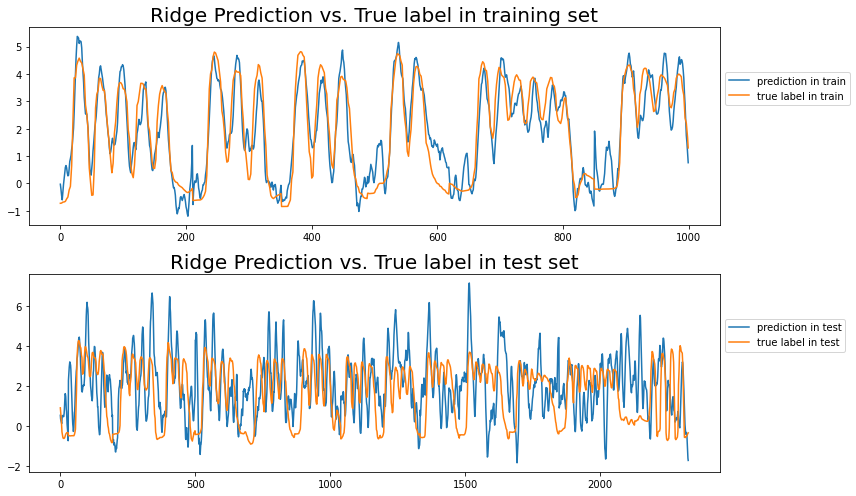

In [15]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("Ridge Prediction vs. True label in training set", size=20)
plt.plot(ridge_pred_train, label='prediction in train')
plt.plot(YTrain, label='true label in train')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.add_subplot(2, 1, 2)
plt.title("Ridge Prediction vs. True label in test set", size=20)
plt.plot(ridge_pred_test, label='prediction in test')
plt.plot(YTest, label='true label in test')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.tight_layout()
plt.show()

In [16]:
ridge_mse_train = mean_squared_error(y_true=YTrain, y_pred=ridge_pred_train)
ridge_r2_train = r2_score(y_true=YTrain, y_pred=ridge_pred_train)

ridge_mse_test = mean_squared_error(y_true=YTest, y_pred=ridge_pred_test)
ridge_r2_test = r2_score(y_true=YTest, y_pred=ridge_pred_test)

print(f"For training set: MSE={ridge_mse_train}; R2={ridge_r2_train}")
print(f"For test set: MSE={ridge_mse_test}; R2={ridge_r2_test}")

For training set: MSE=0.5041768297327898; R2=0.8394646608871272
For test set: MSE=3.003842959535569; R2=-0.40861817223916086


There is no evident performance improve, compared with Ordinary Least Squares estimator.

## Grid search hyperparameter

In [17]:
mse_train_list = []
mse_test_list = []
params_list = []

# In order to garantee take enough values in each scale, we take equidistant values in [-3,5], then pass them through power function. 
alphas = 10**(np.linspace(-3, 5, 100))

for alpha in alphas:
    rig = Ridge(alpha).fit(XTrain, YTrain)
    rig_pred_train = rig.predict(XTrain)
    rig_pred_test = rig.predict(XTest)
    mse_train_list.append(mean_squared_error(y_true=YTrain, y_pred=rig_pred_train))
    mse_test_list.append(mean_squared_error(y_true=YTest, y_pred=rig_pred_test))
    params_list.append(rig.coef_[0])

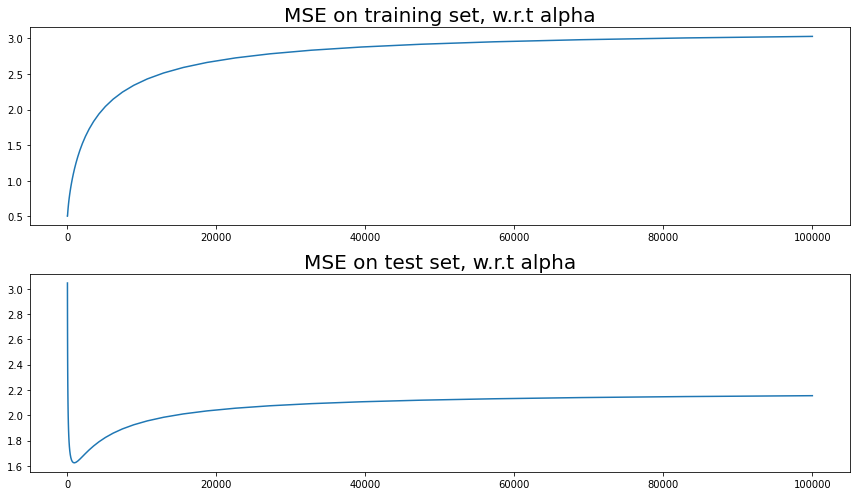

In [18]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("MSE on training set, w.r.t alpha", size=20)
plt.plot(alphas, mse_train_list)

f.add_subplot(2, 1, 2)
plt.title("MSE on test set, w.r.t alpha", size=20)
plt.plot(alphas, mse_test_list)

f.tight_layout()
plt.show()

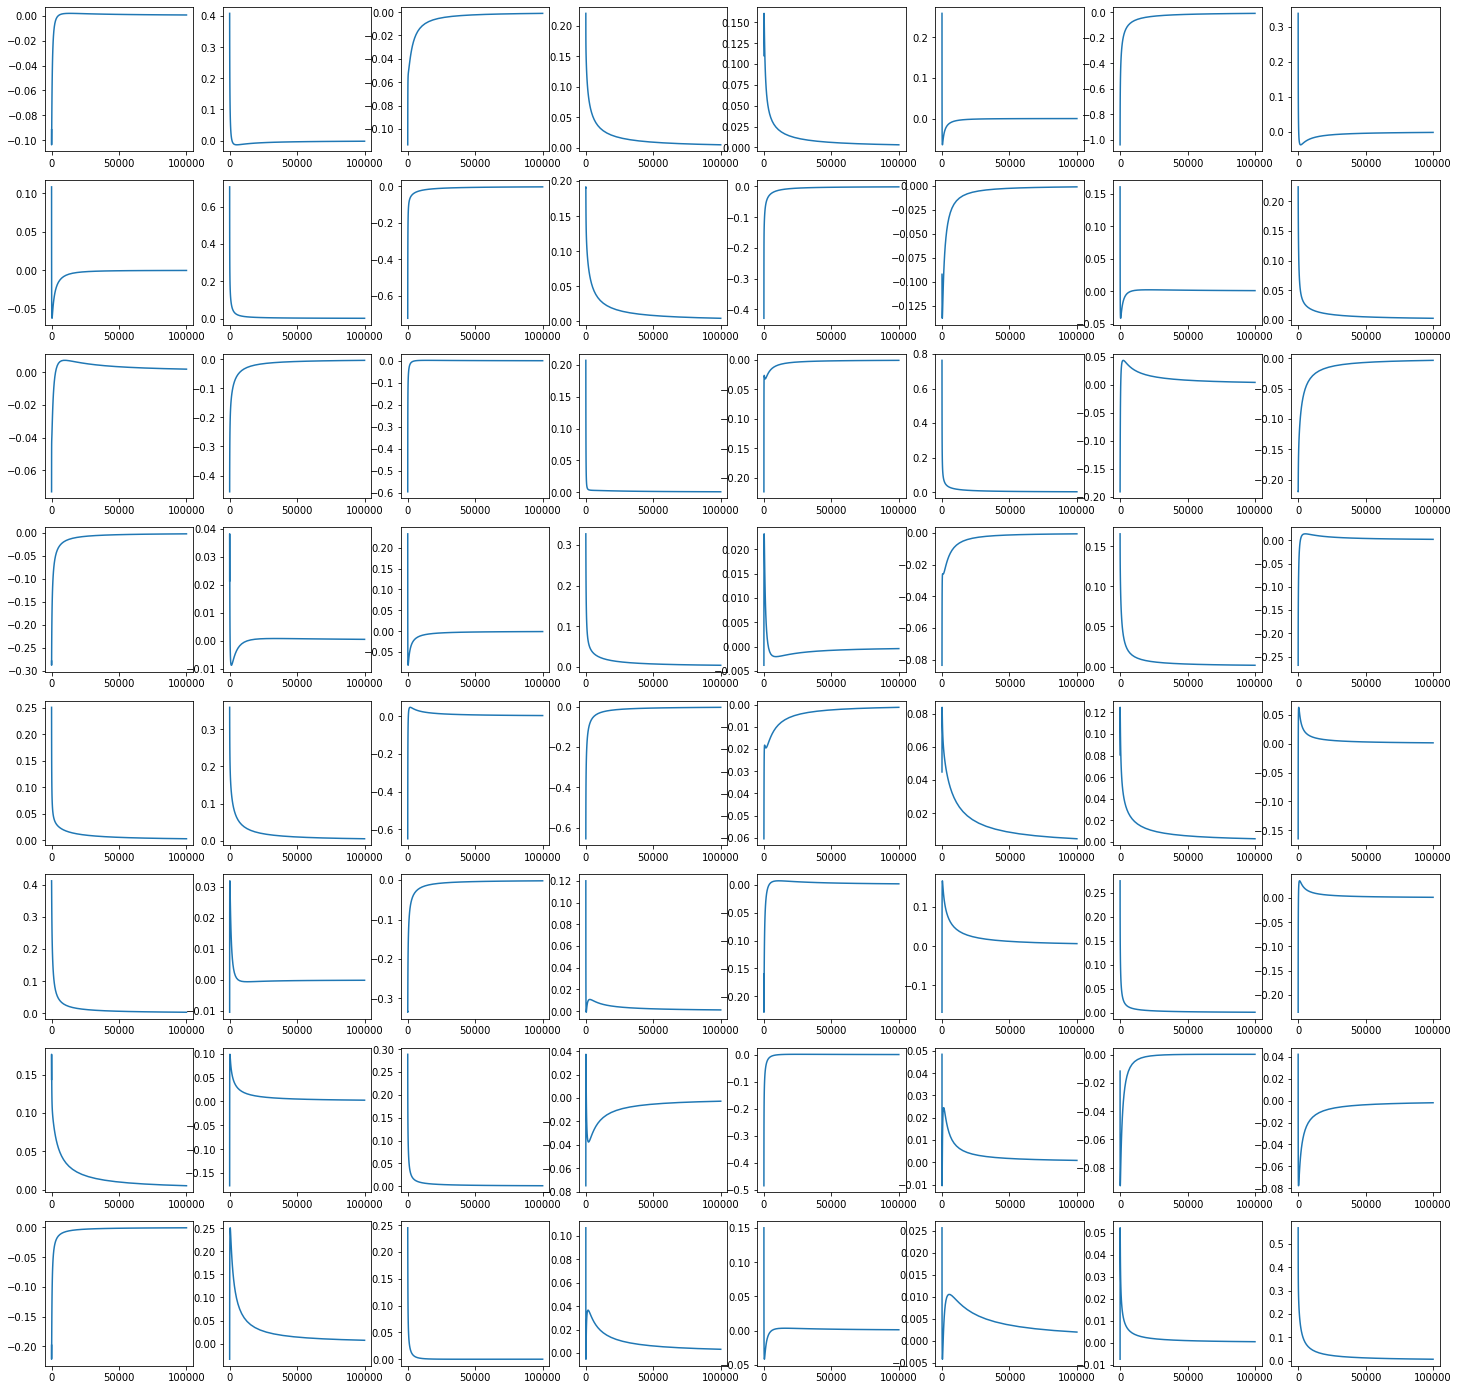

In [19]:
fig, ax = plt.subplots(8, 8, figsize=(25,25))
for i in range(64):
    ax[i%8, int(i/8)].plot(alphas, [params[i] for params in params_list])

f.tight_layout()
plt.show()

Not suprisingly, as the ridge factor increases, all the parameters tend to zero (the penalty of reguralization is much bigger than MSE term). 

MSE on test set admits a minimum, we can select the best ridge factor for which the minimum is achieved.

In [20]:
best_alpha = alphas[np.argmin(mse_test_list)]
print(f"The best value of regularization parameter is {best_alpha}")

The best value of regularization parameter is 954.5484566618347


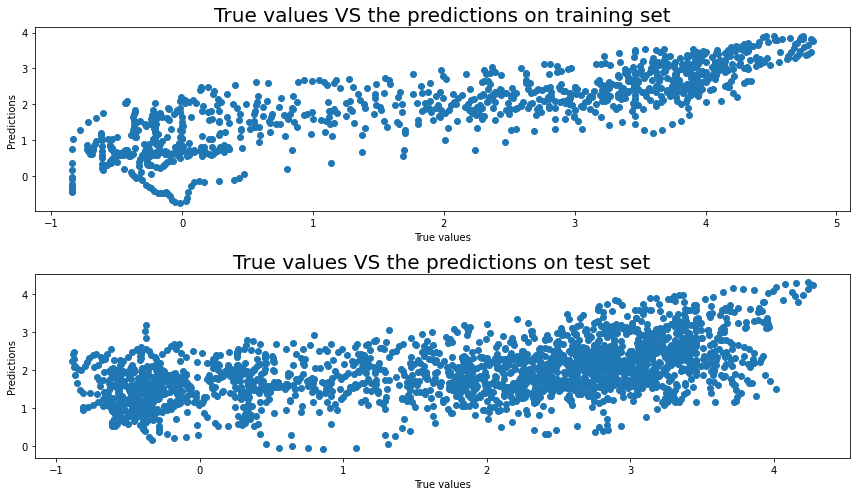

In [21]:
rig_best = Ridge(best_alpha).fit(XTrain, YTrain)
rig_pred_train = rig_best.predict(XTrain)
rig_pred_test = rig_best.predict(XTest)

f = plt.figure(figsize=(12,7))
f.add_subplot(2, 1, 1)
plt.title("True values VS the predictions on training set", size=20)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.scatter(x=YTrain, y=rig_pred_train)

f.add_subplot(2, 1, 2)
plt.title("True values VS the predictions on test set", size=20)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.scatter(x=YTest, y=rig_pred_test)

f.tight_layout()
plt.show()

We would say it is a good prediction if the scatter plot of True values VS predictions is close to (y=x).

On training set, it is not far away from (y=x), the prediction is not so bad. But on test set, it is not a good prediction.

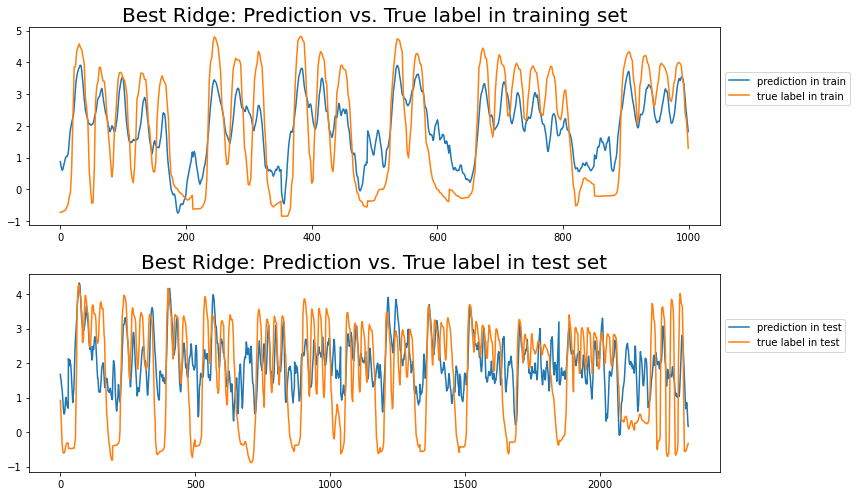

In [22]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("Best Ridge: Prediction vs. True label in training set", size=20)
plt.plot(rig_pred_train, label='prediction in train')
plt.plot(YTrain, label='true label in train')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.add_subplot(2, 1, 2)
plt.title("Best Ridge: Prediction vs. True label in test set", size=20)
plt.plot(rig_pred_test, label='prediction in test')
plt.plot(YTest, label='true label in test')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.tight_layout()
plt.show()

Comments: On training set, the performance is worse than before (when alpha=1), meaning that the regularization works. 

On test set, the prediction becomes better compared with before. But it is still not performant.

In [23]:
mean_squared_error(y_true=YTrain, y_pred=rig_pred_train)
r2_score(y_true=YTest, y_pred=rig_pred_test)

print(f"For training set: MSE={mean_squared_error(y_true=YTrain, y_pred=rig_pred_train)}; R2={r2_score(y_true=YTrain, y_pred=rig_pred_train)}")
print(f"For test set: MSE={mean_squared_error(y_true=YTest, y_pred=rig_pred_test)}; R2={r2_score(y_true=YTest, y_pred=rig_pred_test)}")

For training set: MSE=1.1719430382009628; R2=0.6268406996047916
For test set: MSE=1.6239059826952074; R2=0.23848766129037868


Recall that for LS, on training set: MSE=0.50; R2=0.84; on test set: MSE=3.05; R2=-0.43.

As we discussed just right, the performance of Ridge on training set is not as good as that of LS, because of the regularization. But we notice an improve of performance on test set for Ridge estimator.


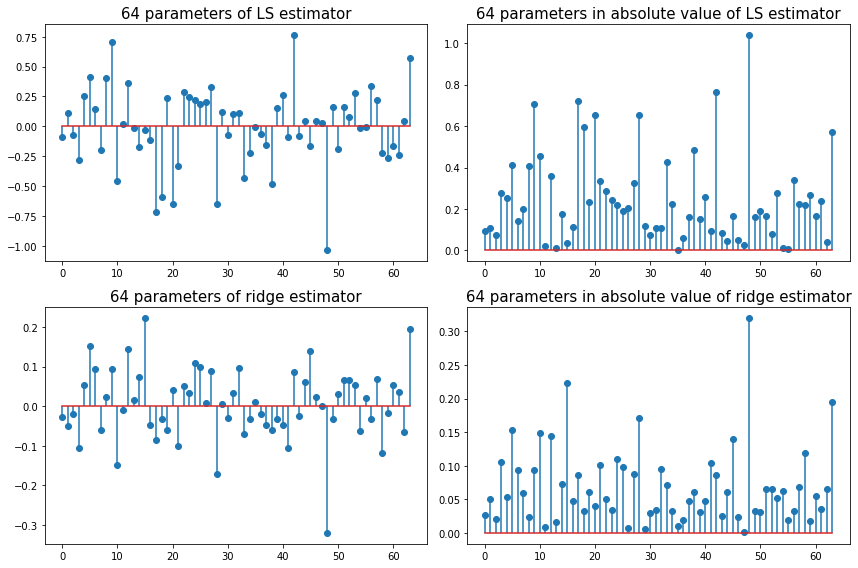

In [24]:
w_reg = reg.coef_[0]
w_rig_best = rig_best.coef_[0]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
# plt.title("64 parameters of ridge estimator", size=15)
ax[0,0].stem(w_reg)
ax[0,0].set_title('64 parameters of LS estimator', fontsize=15)
ax[0,1].stem(abs(w_reg))
ax[0,1].set_title("64 parameters in absolute value of LS estimator", fontsize=15)

ax[1,0].stem(w_rig_best)
ax[1,0].set_title("64 parameters of ridge estimator", fontsize=15)
ax[1,1].stem(abs(w_rig_best))
ax[1,1].set_title("64 parameters in absolute value of ridge estimator", fontsize=15)

fig.tight_layout()
plt.show()

Looking at the absolute value of parameters, we notice that these two estimators treat the similar variables as important variables (with large magnitude of $w_i$ in both estimators). For example, 15th and 48th variables.

Another point, we can verify that the absolute value of parameters in ridge estimator are indeed smaller.

# Variable selection with the Lasso

In [25]:
las = Lasso().fit(XTrain, YTrain)
las_pred_train = las.predict(XTrain)
las_pred_test = las.predict(XTest)

mse_train = mean_squared_error(y_true=YTrain, y_pred=las_pred_train)
r2_train = r2_score(y_true=YTrain, y_pred=las_pred_train)
mse_test = mean_squared_error(y_true=YTest, y_pred=las_pred_test)
r2_test = r2_score(y_true=YTest, y_pred=las_pred_test)

print(f"For training set: MSE={mse_train}; R2={r2_train}")
print(f"For test set: MSE={mse_test}; R2={r2_test}")

For training set: MSE=3.1405971577280063; R2=0.0
For test set: MSE=2.190675841640482; R2=-0.02729265197579034


Even on training set, R2 score is 0, meaning that the prediction on training set is really bad. The default regularization parameter is not good.

In [26]:
lambdas = np.logspace(-3, 5, 100)
mse_train_list, mse_test_list = [], []
for lam in lambdas:
    las = Lasso(alpha=lam).fit(XTrain, YTrain)
    las_pred_train = las.predict(XTrain)
    las_pred_test = las.predict(XTest)
    mse_train_list.append(mean_squared_error(y_true=YTrain, y_pred=las_pred_train))
    mse_test_list.append(mean_squared_error(y_true=YTest, y_pred=las_pred_test))

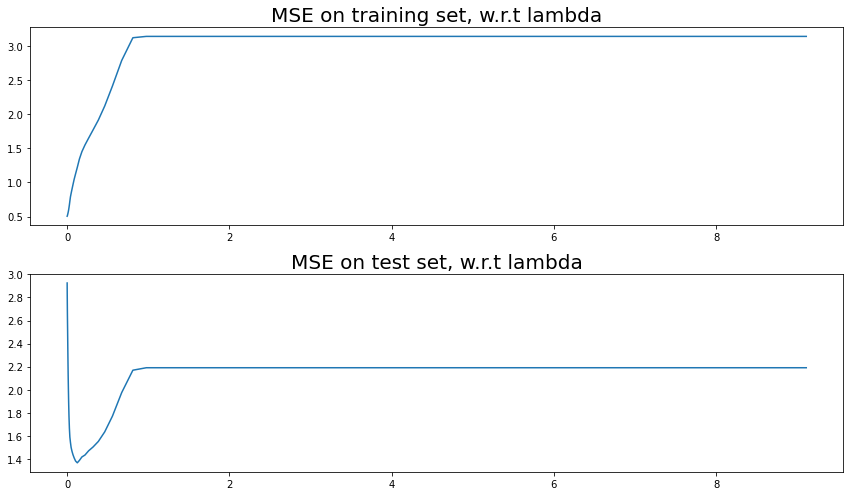

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(12,7))

ax[0].plot(lambdas[:50], mse_train_list[:50])
ax[0].set_title("MSE on training set, w.r.t lambda", size=20)
ax[1].plot(lambdas[:50], mse_test_list[:50])
ax[1].set_title("MSE on test set, w.r.t lambda", size=20)
fig.tight_layout()
plt.show()

With the whole range of lambda, we could not see anything (the important information locates in $\lambda \in [0.1,10]$). 

Therefore, I've taken the first 50 values of lambda, noticing that there exists a best value for which the MSE on test set is minimum.

In [28]:
best_lam = lambdas[np.argmin(mse_test_list)]
print(f"For Lasso, the best value of regularization parameter is {best_lam}")

For Lasso, the best value of regularization parameter is 0.1261856883066021


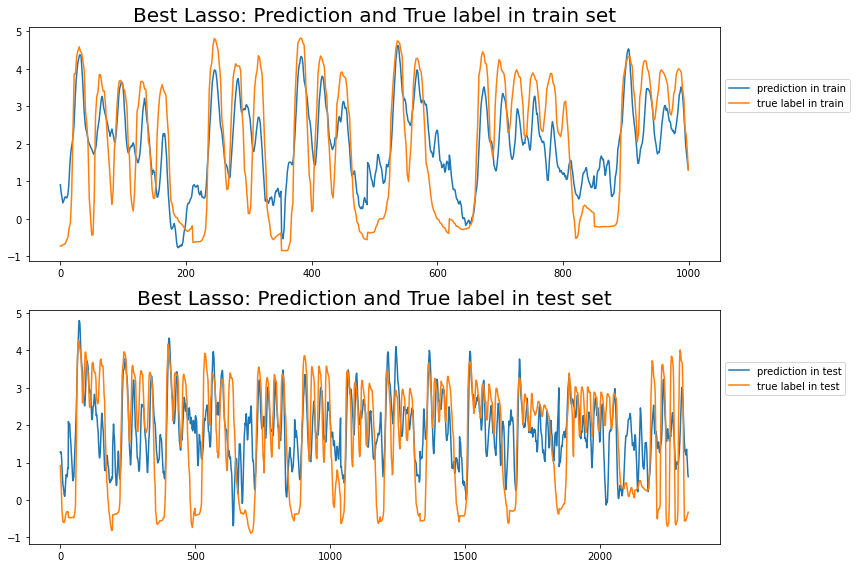

In [29]:
las_best = Lasso(alpha=best_lam).fit(XTrain, YTrain)
las_pred_train = las_best.predict(XTrain)
las_pred_test = las_best.predict(XTest)

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(las_pred_train, label='prediction in train')
ax[0].plot(YTrain, label='true label in train')
ax[0].set_title("Best Lasso: Prediction and True label in train set", size=20)
ax[0].legend(loc=0, bbox_to_anchor=(1, 0.8))

ax[1].plot(las_pred_test, label='prediction in test')
ax[1].plot(YTest, label='true label in test')
ax[1].set_title("Best Lasso: Prediction and True label in test set", size=20)
ax[1].legend(loc=0, bbox_to_anchor=(1, 0.8))

fig.tight_layout()
plt.show()

In [30]:
las_mse_train = mean_squared_error(y_true=YTrain, y_pred=las_pred_train)
las_r2_train = r2_score(y_true=YTrain, y_pred=las_pred_train)
las_mse_test = mean_squared_error(y_true=YTest, y_pred=las_pred_test)
las_r2_test = r2_score(y_true=YTest, y_pred=las_pred_test)

print(f"For training set: MSE={las_mse_train}; R2={las_r2_train}")
print(f"For test set: MSE={las_mse_test}; R2={las_r2_test}")

For training set: MSE=1.2215631527944377; R2=0.6110411200657935
For test set: MSE=1.3659542352560023; R2=0.359451214944292


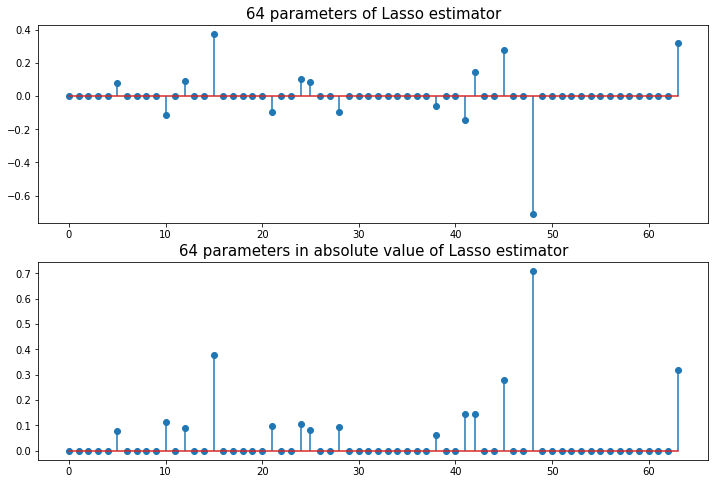

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0].stem(las_best.coef_)
ax[0].set_title("64 parameters of Lasso estimator", fontsize=15)
ax[1].stem(abs(las_best.coef_))
ax[1].set_title("64 parameters in absolute value of Lasso estimator", fontsize=15)

plt.show()

The two most important variables are 15th and 48th variables. 

Lasso estimator has selected 14 features, whose parameter is relatively large.

# Nonlinear regression

In [45]:
def evaluate_models(estimator_name, return_metric=False):
    est = eval(estimator_name)().fit(XTrain, YTrain)
    pred_train = est.predict(XTrain)
    pred_test = est.predict(XTest)
    mse_train = mean_squared_error(y_true=YTrain, y_pred=pred_train)
    mse_test = mean_squared_error(y_true=YTest, y_pred=pred_test)
    r2_train = r2_score(y_true=YTrain, y_pred=pred_train)
    r2_test = r2_score(y_true=YTest, y_pred=pred_test)
    print("Estimator " + estimator_name + ":")
    print(f"Training set: MSE={round(mse_train, 3)}; R2={round(r2_train, 3)}; Test set: MSE={round(mse_test, 3)}; R2={round(r2_test, 3)}")
    if return_metric:
        return mse_train, mse_test, r2_train, r2_test

In [46]:
evaluate_models(estimator_name="RandomForestRegressor")
evaluate_models(estimator_name="SVR")
evaluate_models(estimator_name="MLPRegressor")
evaluate_models(estimator_name="GradientBoostingRegressor")

Estimator RandomForestRegressor:
Training set: MSE=0.023; R2=0.993; Test set: MSE=1.71; R2=0.198
Estimator SVR:
Training set: MSE=0.024; R2=0.992; Test set: MSE=1.515; R2=0.289
Estimator MLPRegressor:
Training set: MSE=0.009; R2=0.997; Test set: MSE=2.254; R2=-0.057
Estimator GradientBoostingRegressor:
Training set: MSE=0.113; R2=0.964; Test set: MSE=1.667; R2=0.218


Recall: 

LS estimator, on test set: MSE=3.05; R2=-0.43;

Best Ridge esimator, on test set: MSE=1.62; R2=0.24;

Best Lasso esimator, on test set: MSE=1.37; R2=0.36;

Comments:

Without fine tuning the hyperparameters, the SVR is better than the best Ridge estimator, a bit worse than the best Lasso estimator. 

GradientBoosting and RandomForest are a little bit worse than the best Ridge estimator. 

MLP is the worst for default parameters.


In [83]:
def fine_tune(estimator_name, param_name, values):
    # evaluate the model on different values of assigned paramater. 
    # Then select the model with best performance on test set, plot its prediction vs true values 
    mse_train_list, mse_test_list = [], []
    for value in values:
        est = eval(estimator_name)(**{param_name:value}).fit(XTrain, YTrain)
        pred_train = est.predict(XTrain)
        pred_test = est.predict(XTest)
        mse_train_list.append(mean_squared_error(y_true=YTrain, y_pred=pred_train))
        mse_test_list.append(mean_squared_error(y_true=YTest, y_pred=pred_test))
    
    fig, ax = plt.subplots(2, 1, figsize=(12,7))
    ax[0].plot(values, mse_train_list)
    ax[0].set_title(estimator_name + ": MSE on training set, w.r.t " + param_name, size=20)
    ax[1].plot(values, mse_test_list)
    ax[1].set_title(estimator_name + ": MSE on test set, w.r.t " + param_name, size=20)
    fig.tight_layout()

    best_param = values[np.argmin(mse_test_list)]
    best_model = eval(estimator_name)(**{param_name:best_param}).fit(XTrain, YTrain)
    pred_train = best_model.predict(XTrain)
    pred_test = best_model.predict(XTest)
    f = plt.figure(figsize=(12,7))
    f.add_subplot(2, 1, 1)
    plt.title("Best " + estimator_name + ": Prediction vs. True label in training set", size=20)
    plt.plot(pred_train, label='prediction in train')
    plt.plot(YTrain, label='true label in train')
    plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

    f.add_subplot(2, 1, 2)
    plt.title("Best " + estimator_name + ": Prediction vs. True label in test set", size=20)
    plt.plot(pred_test, label='prediction in test')
    plt.plot(YTest, label='true label in test')
    plt.legend(loc=0, bbox_to_anchor=(1, 0.8))
    f.tight_layout()
    plt.show()

    mse_train = mean_squared_error(y_true=YTrain, y_pred=pred_train)
    r2_train = r2_score(y_true=YTrain, y_pred=pred_train)
    mse_test = mean_squared_error(y_true=YTest, y_pred=pred_test)
    r2_test = r2_score(y_true=YTest, y_pred=pred_test)
    print("Best " + estimator_name + f": For training set, MSE={mse_train}; R2={r2_train}")
    print("Best " + estimator_name + f": For test set: MSE={mse_test}; R2={r2_test}")
    print("Best parameter: " + param_name + f"= {best_param}")

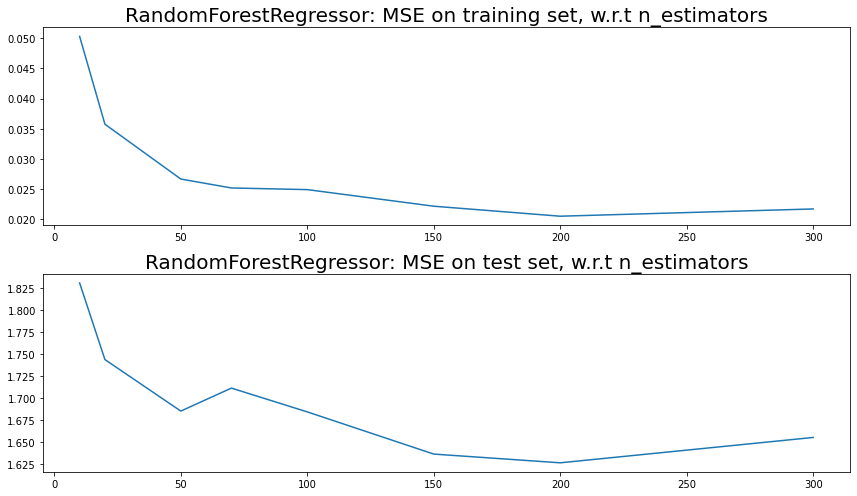

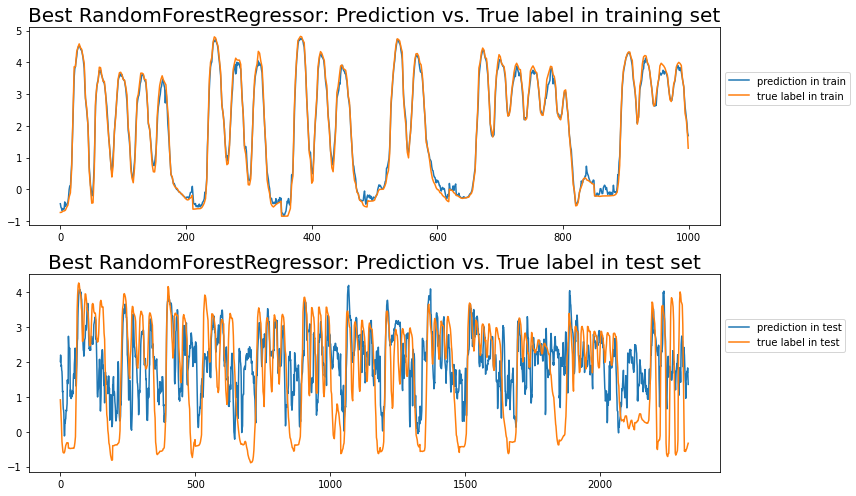

Best RandomForestRegressor: For training set, MSE=0.021950052053325807; R2=0.9930108667393671
Best RandomForestRegressor: For test set: MSE=1.642854198205578; R2=0.22960210999526742
Best parameter: n_estimators= 200


In [84]:
fine_tune("RandomForestRegressor", "n_estimators", [10, 20, 50, 70, 100, 150, 200, 300])

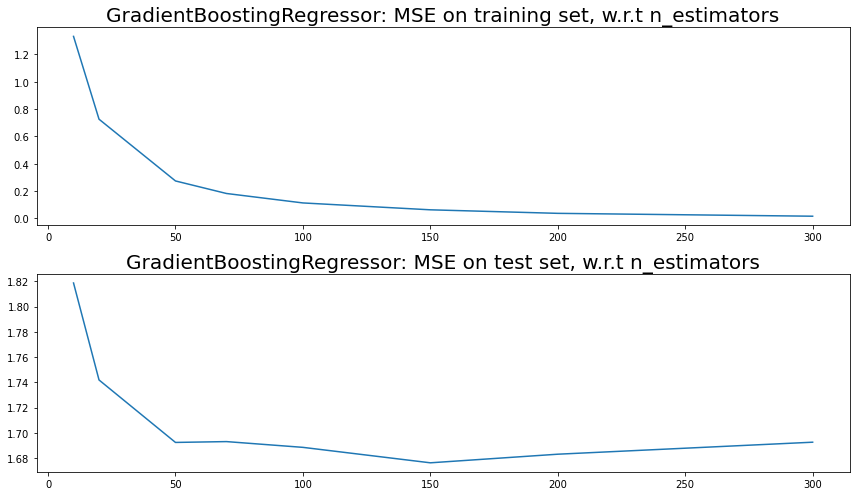

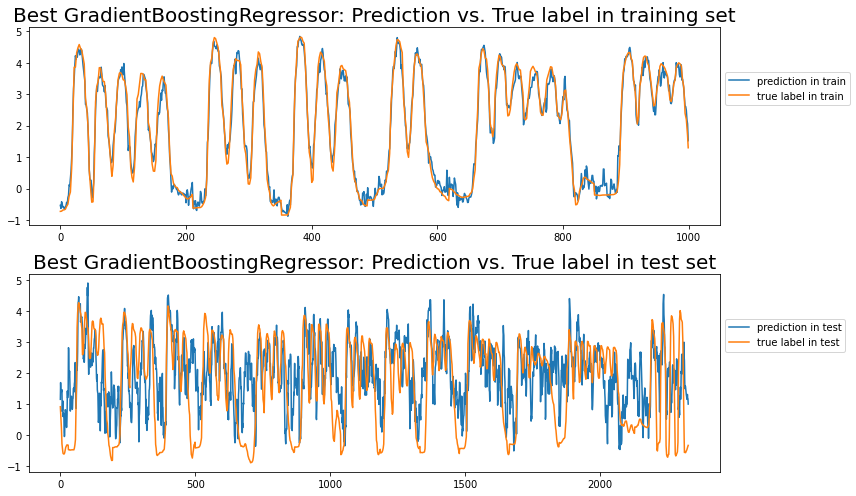

Best GradientBoostingRegressor: For training set, MSE=0.06304822487794443; R2=0.9799247653514546
Best GradientBoostingRegressor: For test set: MSE=1.6748249494916623; R2=0.21460978787710983
Best parameter: n_estimators= 150


In [85]:
fine_tune("GradientBoostingRegressor", "n_estimators", [10, 20, 50, 70, 100, 150, 200, 300])

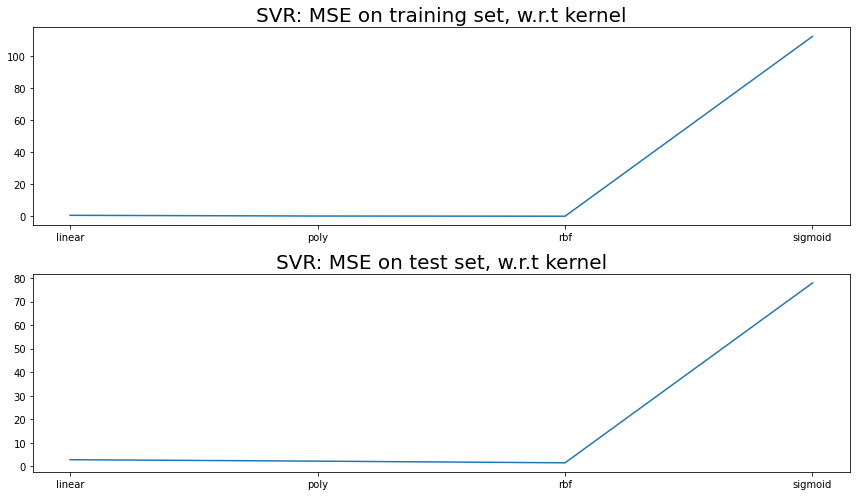

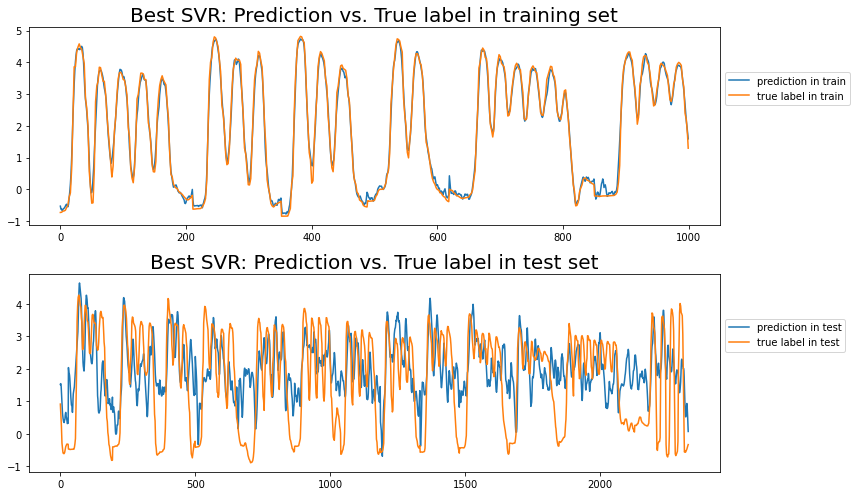

Best SVR: For training set, MSE=0.024085982516610357; R2=0.9923307634481734
Best SVR: For test set: MSE=1.515182870123942; R2=0.28947213490412815
Best parameter: kernel= rbf


In [86]:
fine_tune("SVR", "kernel", ['linear', 'poly', 'rbf', 'sigmoid'])

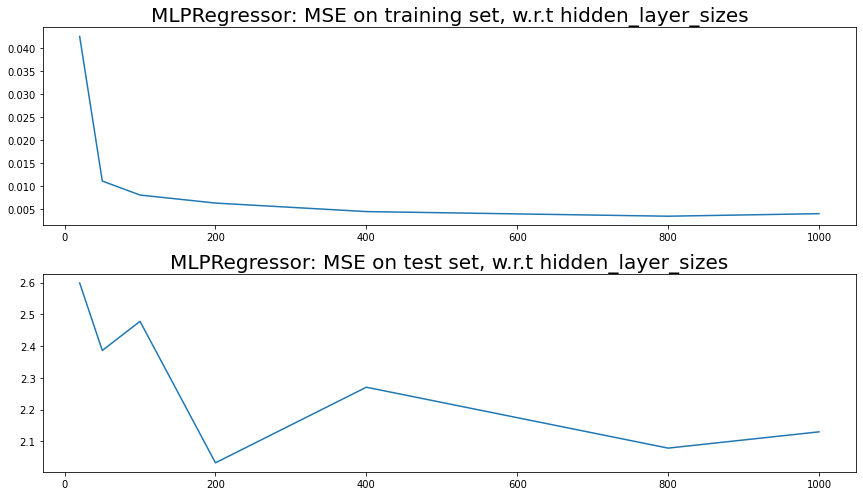

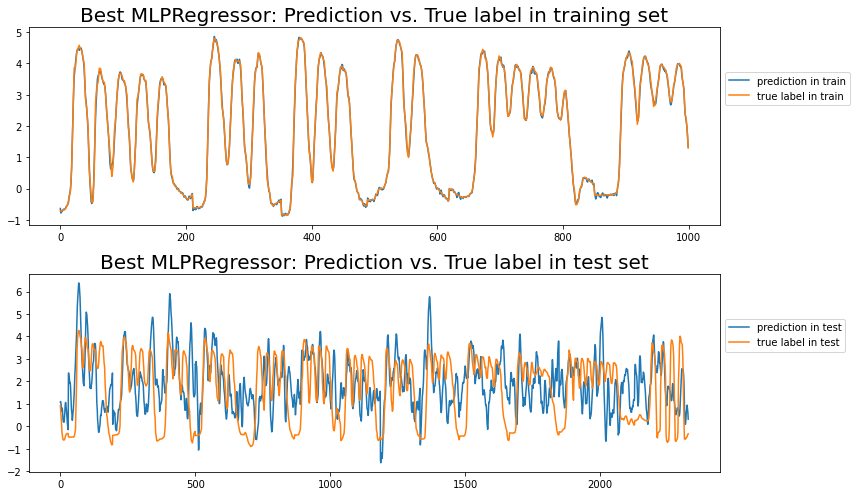

Best MLPRegressor: For training set, MSE=0.005386796253244645; R2=0.9982847859872797
Best MLPRegressor: For test set: MSE=2.192085958960308; R2=-0.027953910539721294
Best parameter: hidden_layer_sizes= (200,)


In [88]:
fine_tune("MLPRegressor", "hidden_layer_sizes", [(20,), (50,), (100,), (200,), (400,), (800,), (1000,)])

After tuning some parameters of models, the performance becomes a little bit better. But we could not say they are good estimators

# Final comparison of the performances

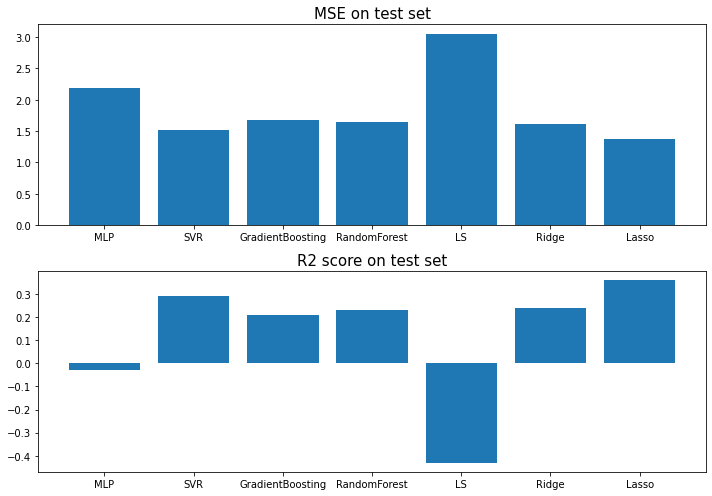

In [94]:
estimators = ["MLP", "SVR", "GradientBoosting", "RandomForest", "LS", "Ridge", "Lasso"]
mse_test = [2.19, 1.52, 1.67, 1.64, 3.05, 1.62, 1.37]
r2_test = [-0.03, 0.29, 0.21, 0.23, -0.43, 0.24, 0.36]

fig, ax = plt.subplots(2, 1, figsize=(10,7))
ax[0].bar(estimators, mse_test)
ax[0].set_title("MSE on test set", size=15)
ax[1].bar(estimators, r2_test)
ax[1].set_title("R2 score on test set", size=15)
fig.tight_layout()
plt.show()

In practice, the best model is Lasso. Meanwhile, Lasso provides a good interpretability: it selects some important variables and performs a linear regression on them. From a practical view, only several eletrodes provides useful information to finish the prediction. The result proves that we do not need non-linearity.

This task do not involve disease prediction. Otherwise, we must consider the False negative and False positive. These two indices are both important.

In practice, we do not perform validation on test set. We will divide the training set into two parts: first one serves to train data; second one serves as validation set. Two reasons: 1. validation on test set would introduce bias; 2. we do not always have test data on hand when we select model (often test data comes as a data streaming).

# Comments on this lab

From this lab, I undertand better the notion: Lasso regularization could select features; Ridge regularization could reduce the magnitude of parameters.

This dataset is hard to predict. We can easily fall into the overfitting trap. Finally, we did not obtain a satisfactory model. The relative best one is Lasso estimator. The introduce of non-linearity even leads to a worse performance on test set, compared to a regularized linear model. 

In [95]:
!jupyter nbconvert --to html ML_TP2.ipynb

[NbConvertApp] Converting notebook ML_TP2.ipynb to html
[NbConvertApp] Writing 3121321 bytes to ML_TP2.html
